# ポートフォリオ「CNNを用いた医用画像分類（病理組織）」（仲本夏生）

## 0.0 アウトライン

### 0.1 概要

- この分析では、病理組織画像をCNN（畳み込みニューラルネットワーク）により9クラスに分類することを目的としている。
- なお、データセットは、MedMNISTデータセットよりPathMNIST（28×28ピクセルの結腸の病理組織画像）をダウンロードして使用する。。

### 0.2 本ポートフォリオの流れ

1. 方針
2. データの準備と可視化
3. 基本性能の確認
4. パラメータ調整
5. まとめ

## 1.0 方針

- 今回、画像分類をするために、CNNを用いてその性能を確かめたい。
- なお、詳しいCNNの仕組みについては別途記事にまとめた。  
**[Qiita記事：【深層学習】CNNまとめ（仕組み、ちょっとだけ数式）](https://qiita.com/nakamin/items/5096924cf4460054077d)**

### 1.1 方針

- まず、今回のデータセットにおけるCNNを基本性能を確認するために、LenetとVGGを基にした以下**2つのシンプルなモデル**を設計しその結果を確認し、そこからパラメータ調整を施していきたい。
- また、今回の性能評価としては、**Accuracy（正答率）**を採用する。

#### ベースライン①：改良版LeNet

- 参考：[CVMLエキスパートガイド LeNet: 最初のCNN構造](https://cvml-expertguide.net/terms/dl/cnn/cnn-backbone/lenet/)

<left><img src="./imgs/LeNet-1024x544.png" width=400px></left>

- MNISTのような手書き数字認識で開発された、畳み込みニューラルネットワークの基本形。
- 計算コストが低く、MNISTやCIFAR-10のような小規模なデータセットに適している。
- **構造**
    - 【入力】32×32の画像（1チャンネル、画像全体で画素値を正規化済み）
    - 【畳み込み層1】5×5フィルター×6チャンネルを適用 → 28x28x6の特徴マップを得る
    - 【プーリング層1】2×2平均プーリング、ストライド幅2 → 14x14x6の特徴マップを得る
    - 【畳み込み層2】5×5フィルター×16チャンネルを適用 → 10x10x16の特徴マップを得る
    - 【プーリング層2】2×2平均プーリング、ストライド幅2 → 5x5x16の特徴マップを得る
    - 【全結合層】120ユニット
    - 【全結合層】84ユニット
    - 【出力】10次元ベクトル（各次元の出力確率）各次元の出力確率)．

- **上記構造から今回のデータセットに合わせて変更する点**
    - 隠れ層：tanh関数 → ReLU関数
    - プーリング層：平均プーリング → 最大プーリング
    - 出力層： ガウス分布に基づいた重み付け接続 → sigmoid関数

#### ベースライン②：軽量版VGG

- 参考：[CVMLエキスパートガイド VGGNet: 初期の定番CNN](https://cvml-expertguide.net/terms/dl/cnn/cnn-backbone/vggnet/)

<left><img src="./imgs/vggnet-1.png" width=400px></left>

- VGGの説明  
**構造**  
- ブロック1
    - 【畳み込み層1-1】 3×3フィルター×64チャンネルを適用 → 224×224×64の特徴マップを得る
    - 【畳み込み層1-2】 3×3フィルター×64チャンネルを適用 → 224×224×64の特徴マップを得る
    - 【プーリング層1】 2×2最大プーリング、ストライド幅2 → 112×112×64の特徴マップを得る
- ブロック2
    - 【畳み込み層2-1】 3×3フィルター×128チャンネルを適用 → 112×112×128の特徴マップを得る
    - 【畳み込み層2-2】 3×3フィルター×128チャンネルを適用 → 112×112×128の特徴マップを得る
    - 【プーリング層2】 2×2最大プーリング、ストライド幅2 → 56×56×128の特徴マップを得る
- ブロック3
    - 【畳み込み層3-1】 3×3フィルター×256チャンネルを適用 → 56×56×256の特徴マップを得る
    - 【畳み込み層3-2】 3×3フィルター×256チャンネルを適用 → 56×56×256の特徴マップを得る
    - 【畳み込み層3-3】 3×3フィルター×256チャンネルを適用 → 56×56×256の特徴マップを得る
    - 【プーリング層3】 2×2最大プーリング、ストライド幅2 → 28×28×256の特徴マップを得る
- ブロック4
    - 【畳み込み層4-1】 3×3フィルター×512チャンネルを適用 → 28×28×512の特徴マップを得る
    - 【畳み込み層4-2】 3×3フィルター×512チャンネルを適用 → 28×28×512の特徴マップを得る
    - 【畳み込み層4-3】 3×3フィルター×512チャンネルを適用 → 28×28×512の特徴マップを得る
    - 【プーリング層4】 2×2最大プーリング、ストライド幅2 → 14×14×512の特徴マップを得る
- ブロック5
    - 【畳み込み層5-1】 3×3フィルター×512チャンネルを適用 → 14×14×512の特徴マップを得る
    - 【畳み込み層5-2】 3×3フィルター×512チャンネルを適用 → 14×14×512の特徴マップを得る
    - 【畳み込み層5-3】 3×3フィルター×512チャンネルを適用 → 14×14×512の特徴マップを得る
    - 【プーリング層5】 2×2最大プーリング、ストライド幅2 → 7×7×512の特徴マップを得る
- 全結合層
    - 【全結合層1】 7×7×512の特徴量をフラット化 → 4096ユニット
    - 【全結合層2】 4096ユニット → 4096ユニット
    - 【全結合層3】 4096ユニット → 1000ユニット
- 出力
    - 【出力】 1000次元ベクトル（各クラスの出力確率）

- **上記構造から今回のデータセットに合わせて変更する点**
    - 2つのブロック構造に変更し軽量化

## 2.0 データの準備と可視化

- 前提として、PathMNISTの画像データはすでに28×28ピクセルの形状に統一されている。
- また、以下のように学習用、検証用、テスト用データを分けてダウンロードすることが可能となっている。
    - 訓練データ：89,996件
    - 検証データ：10,004件
    - テストデータ：7,180件
- ここでは、PyTorchモデルで利用できる形に整えていくために、テンソル形式への変換とピクセル値を(-1, 1)の範囲にスケールしたい。
- なお、今回train_datasetを2つの目的で使用する。
    - 学習用：テンソル形式に変換
    - 可視化用：そのままnumpyで扱う

### 2.1 可視化

In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from torchsummary import summary
from visdom import Visdom

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torch.optim.lr_scheduler import StepLR

import medmnist
from medmnist import INFO, Evaluator

In [2]:
import random
# 再現性のためにランダムシードを設定
def set_seed(seed):
    random.seed(seed) # Python
    np.random.seed(seed) # NumPy
    torch.manual_seed(seed) # PyTorch
    # GPUを使う場合
    # if torch.cuda.is_available():
    #     torch.cuda.manual_seed(seed)
    #     torch.cuda.manual_seed_all(seed)
    #     torch.backends.cudnn.deterministic = True
    #     torch.backends.cudnn.benchmark = False

set_seed(42)  # 任意のシード値

In [3]:
# データセットのダウンロード
from medmnist import PathMNIST
data_flag = 'pathmnist'
info = INFO[data_flag]
# getattrはオブジェクトの属性を取得する組み込み関数（mesmnistがオブジェクト、info['python_class']が取得したい属性の名前）
DataClass = getattr(medmnist, info['python_class'])

# 学習用前処理
data_transform = transforms.Compose([ # 複数の前処理を順番に適用
    transforms.ToTensor(), # 出力の形状は (チャンネル, 高さ, 幅)
    transforms.Normalize(mean=[.5], std=[.5]) # テンソルデータをゼロ平均・単位分散に標準化
])
# データセットの作成（学習用）
train_data = DataClass(split='train', transform=data_transform, download=True)
val_data = DataClass(split='val', transform=data_transform, download=True)
test_data = DataClass(split='test', transform=data_transform, download=True)

# 可視化用前処理
visual_transform = transforms.Compose([
    transforms.ToTensor()  # Normalizeは不要
])
# データセットの作成（可視化用）
visual_data = medmnist.PathMNIST(split='train', transform=visual_transform, download=True)

Using downloaded and verified file: /home/jovyan/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/jovyan/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/jovyan/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/jovyan/.medmnist/pathmnist.npz


In [4]:
print(train_data)
print("===================")
print(val_data)
print("===================")
print(test_data)

Dataset PathMNIST of size 28 (pathmnist)
    Number of datapoints: 89996
    Root location: /home/jovyan/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-

In [5]:
# 要素を確認
img = visual_data[0][0]
label = visual_data[0][1]

print(f"Image:\n {img}") 
print(f"Label:\n {label}")
print(f"Image shape: {img.shape}")

Image:
 tensor([[[0.8627, 0.8588, 0.8627,  ..., 0.8627, 0.8588, 0.8667],
         [0.8549, 0.8627, 0.8588,  ..., 0.7725, 0.7529, 0.7451],
         [0.8627, 0.8627, 0.8588,  ..., 0.8157, 0.8118, 0.8196],
         ...,
         [0.8549, 0.8510, 0.8667,  ..., 0.8667, 0.8627, 0.8667],
         [0.8353, 0.8510, 0.8667,  ..., 0.8667, 0.8667, 0.8667],
         [0.8431, 0.8627, 0.8667,  ..., 0.8627, 0.8667, 0.8706]],

        [[0.8157, 0.8118, 0.8118,  ..., 0.8157, 0.8118, 0.8157],
         [0.8078, 0.8118, 0.8078,  ..., 0.6941, 0.6745, 0.6588],
         [0.8157, 0.8118, 0.8039,  ..., 0.7490, 0.7529, 0.7608],
         ...,
         [0.8039, 0.7882, 0.8157,  ..., 0.8157, 0.8157, 0.8196],
         [0.7529, 0.7843, 0.8157,  ..., 0.8157, 0.8196, 0.8157],
         [0.7647, 0.8118, 0.8157,  ..., 0.8157, 0.8157, 0.8196]],

        [[0.8902, 0.8902, 0.8902,  ..., 0.8902, 0.8902, 0.8902],
         [0.8863, 0.8863, 0.8863,  ..., 0.7922, 0.7725, 0.7647],
         [0.8863, 0.8863, 0.8824,  ..., 0.8353, 0.

In [6]:
# クラス名の辞書
class_labels = {
    0: '脂肪組織',
    1: '背景',
    2: '破片',
    3: 'リンパ球',
    4: '粘液',
    5: '平滑筋',
    6: '正常な結腸粘膜',
    7: '癌関連間質',
    8: '結腸直腸腺癌上皮'
}
class_labels

{0: '脂肪組織',
 1: '背景',
 2: '破片',
 3: 'リンパ球',
 4: '粘液',
 5: '平滑筋',
 6: '正常な結腸粘膜',
 7: '癌関連間質',
 8: '結腸直腸腺癌上皮'}

In [7]:
# データの中身を確認
visual_data

Dataset PathMNIST of size 28 (pathmnist)
    Number of datapoints: 89996
    Root location: /home/jovyan/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-

- 画像テンソルとそのラベルのペアを含むデータセット
- （データ, ラベル）の形式

In [8]:
# 各クラス（ラベル）に属するデータの枚数をカウントし、クラス名と対応する枚数を出力
from collections import Counter

# データセット内の全てのラベルをリストに格納（ラベルだけ抽出）
all_labels = [int(label.item()) for _, label in visual_data] # テンソルで表されるラベルを整数値に変換

# 各ラベルに属するデータの枚数をカウント
label_counts = Counter(all_labels) # キーがラベル、値がそのラベルの枚数という構造

# ラベルIDに対応するクラス名を取得
class_labels_list = [class_labels[class_id] for class_id in label_counts.keys()] # ラベルIDのリストをループし、対応するクラス名を取得
# 各ラベルのデータ枚数をリストとして抽出
counts = list(label_counts.values())

# クラス名をソートして分布を表示
sorted_items = sorted(zip(class_labels_list, counts), key=lambda x: x[0]) # クラス名とその枚数をペアにする
for class_name, count in sorted_items:
    print(f"{class_name}: {count} 枚")

リンパ球: 10401 枚
平滑筋: 12182 枚
正常な結腸粘膜: 7886 枚
癌関連間質: 9401 枚
破片: 10360 枚
粘液: 8006 枚
結腸直腸腺癌上皮: 12885 枚
背景: 9509 枚
脂肪組織: 9366 枚


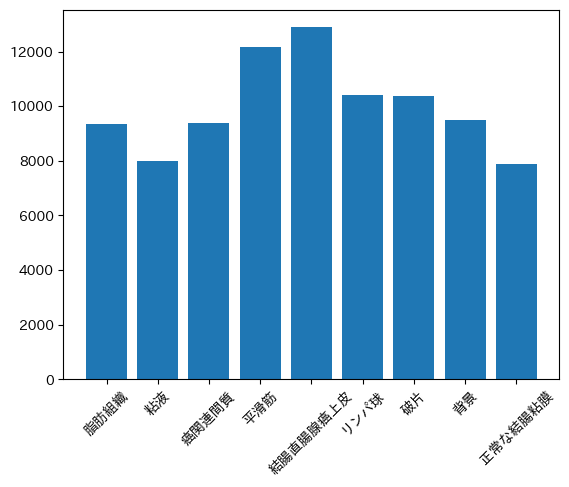

In [9]:
# 分布を可視化
plt.bar(class_labels_list, counts)
plt.xticks(rotation=45)
plt.show()

- 大きなクラス内不均衡は見られない

In [10]:
# classIDに対応する画像を収集する
class_images = {} # クラスIDをキー、画像データを値とする辞書
for image, label in visual_data:
    class_id = int(label.item() if hasattr(label, "item") else label[0]) # クラスIDを取得
    if class_id not in class_images: # クラスごとに1枚の画像を収集
        class_images[class_id] = image
    if len(class_images) == len(class_labels): # 全クラス分が集まったら終了
        break

- hasattr関数
    - Pythonの組み込み関数で、オブジェクトが特定の属性を持っているかを確認するもの
    - hasattr(object, name)で使う（objectに属性を調べたい対象のオブジェクト、nameにチェックしたい属性名を入れる）
    - 今回はlabelがitemというメソッドを持っているかどうかを確認する
    - Trueの場合はlabel.item()を実行し、スカラー値を取得、Falseの場合はlabel[0]を実行して配列の最初の要素を取得する

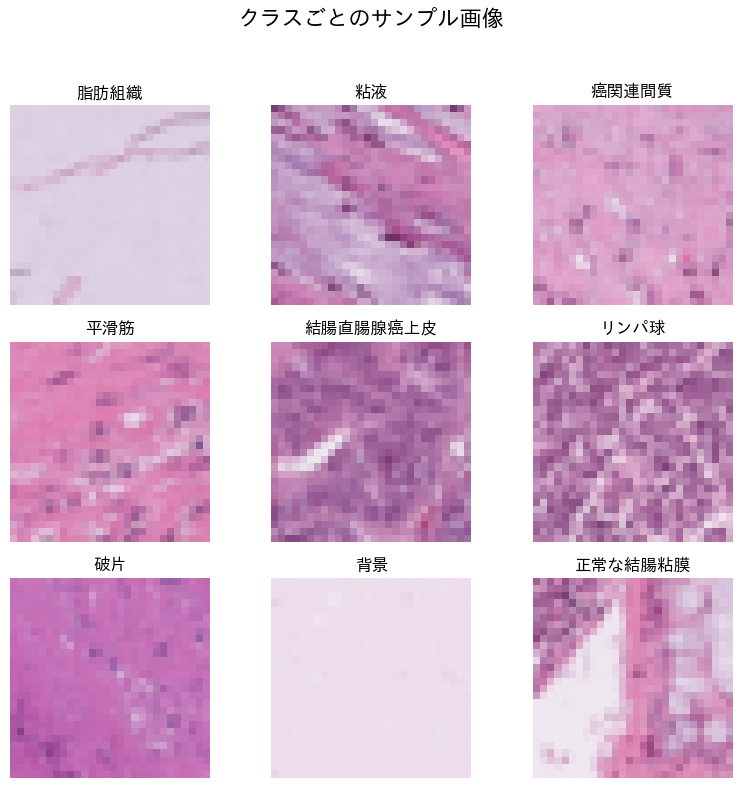

In [11]:
# 3×3のグリッドで画像を表示
fig, axes = plt.subplots(3,3,figsize=(8,8))
fig.suptitle("クラスごとのサンプル画像", fontsize=16)

# 各クラスの画像をプロット
# axes.rabel()で 9 個のプロット領域を平坦化し、ループで各画像を埋め込む
for ax, (class_id, image) in zip(axes.ravel(), class_images.items()):
    # 画像をプロット
    ax.imshow(image.permute(1,2,0).numpy()) # matplotlib の imshow が期待する形式に変換（permuteで次元を並び替え）
    ax.set_title(class_labels[class_id])
    ax.axis("off")
plt.tight_layout(rect=[0,0,1,0.95]) 
# tight_layout(): プロット内の要素が重ならないように自動調整するもの。
# rect = [左端の割合, 下端の割合, 右端の割合, 上端の割合]で、プロット全体の表示領域を図の左端・下端から右端・上端まで調整し、上端に余白（5%分）を確保する設定
plt.show()

### 2.2 前処理

In [12]:
from torch.utils.data import DataLoader

# データローダーに変換
BATCH_SIZE = 128
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset=val_data, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
# 形状の確認
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of val dataloader: {len(val_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 704 batches of 128
Length of test dataloader: 57 batches of 128
Length of val dataloader: 79 batches of 128


In [13]:
# 1バッチ分のデータを取り出し、形状を確認
train_features_batch, train_labels_batch = next(iter(train_dataloader))
# iter()：データローダーからイテレータを作成、next()：イテレータから1回分のデータを取得する
# データローダーから取得したバッチは特徴量(batch_size, channels, height, width)とラベル(batch_size,1)のペアとして返される
train_features_batch.shape, train_labels_batch.shape

(torch.Size([128, 3, 28, 28]), torch.Size([128, 1]))

## 3.0 基本性能を確認

- ベースラインモデルとして、先に挙げた二つのモデルの性能を確かめていく。
- なお、train（訓練）データとval（検証）データでモデルの学習と評価を行い、構造やパラメータの調整にvalデータを使って性能を比較する。学習と評価が終了した段階で、test（テスト）データは最終モデルでの性能評価のために使う。

### 3.1 ベースライン①：改良版LeNet

- **構造**
    - 【入力】28×28の画像（3チャンネル）
    - 【畳み込み層1】5×5フィルター×6チャンネルを適用 → 24x24x6の特徴マップを得る
    - 【プーリング層1】2×2最大プーリング、ストライド幅2 → 12x12x6の特徴マップを得る
    - 【畳み込み層2】2×2フィルター×16チャンネルを適用 → 8x8x16の特徴マップを得る
    - 【プーリング層2】2×2最大プーリング、ストライド幅2 → 4x4x16の特徴マップを得る
    - 【全結合層】120ユニット
    - 【全結合層】84ユニット
    - 【出力】9次元ベクトル（各次元の出力確率）

In [14]:
# Early Stopping クラス
class EarlyStopping:
    def __init__(self, patience=5):
        self.patience = patience
        self.best_loss = float('inf')
        self.trigger_times = 0

    def check(self, current_loss):
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.trigger_times = 0
            return False  # Early Stoppingしない
        else:
            self.trigger_times += 1
            return self.trigger_times >= self.patience  # 改善が見られなければTrue

# モデル管理クラス
class ModelCommon:
    def __init__(self, model, criterion, optimizer, device, experiment_name="model", scheduler=None):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        self.experiment_name = experiment_name
        self.scheduler = scheduler
        self.best_model_path = f"best_model_{experiment_name}.pth"
        self.best_val_loss = float('inf')
        self.early_stopping = EarlyStopping(patience=5)

    def train(self, train_dataloader):
        self.model.train()
        total_loss = 0
        total_acc = 0
        for imgs, labels in train_dataloader:
            imgs = imgs.to(self.device)
            labels = labels.to(self.device).squeeze()
            self.optimizer.zero_grad()
            outputs = self.model(imgs)
            loss = self.criterion(outputs, labels)
            total_loss += loss.item()
            total_acc += (outputs.max(1)[1] == labels).sum().item()
            loss.backward()
            self.optimizer.step()

        avg_loss = total_loss / len(train_dataloader.dataset)
        avg_acc = total_acc / len(train_dataloader.dataset)

        if self.scheduler:
            self.scheduler.step()

        return avg_loss, avg_acc

    def evaluate(self, dataloader):
        self.model.eval()
        total_loss = 0
        total_acc = 0
        y_true, y_pred = [], []
        with torch.no_grad():
            for imgs, labels in dataloader:
                imgs = imgs.to(self.device)
                labels = labels.to(self.device).squeeze()
                outputs = self.model(imgs)
                loss = self.criterion(outputs, labels)
                total_loss += loss.item()
                total_acc += (outputs.max(1)[1] == labels).sum().item()
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(outputs.max(1)[1].cpu().numpy())

        avg_loss = total_loss / len(dataloader.dataset)
        avg_acc = total_acc / len(dataloader.dataset)

        return avg_loss, avg_acc, y_true, y_pred

    def fit(self, train_dataloader, val_dataloader, n_epochs, viz):
        for epoch in range(n_epochs):
            avg_train_loss, avg_train_acc = self.train(train_dataloader)
            avg_val_loss, avg_val_acc, y_true, y_pred = self.evaluate(val_dataloader)

            print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}")
            print(f"Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}")
            
            # 学習曲線をプロット
            self.plot_curves(viz, epoch, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc)

            # Early Stoppingとベストモデルの保存
            if avg_val_loss < self.best_val_loss:
                self.best_val_loss = avg_val_loss
                torch.save(self.model.state_dict(), self.best_model_path)
                print(f"Best model saved at epoch {epoch+1}")
                self.early_stopping.trigger_times = 0
            else:
                if self.early_stopping.check(avg_val_loss):
                    print("Early stopping triggered.")
                    break

        return y_true, y_pred

    def plot_confusion_matrix(self, y_true, y_pred, labels):
        conf_matrix = confusion_matrix(y_true, y_pred, labels=list(range(len(labels))))
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix ({self.experiment_name})")
        plt.show()

    def plot_curves(self, viz, epoch, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc):
        viz.line(X=np.array([epoch]), Y=np.array([avg_train_loss]),
                 win=f'loss_{self.experiment_name}', name='avg_train_loss', update='append',
                 opts={'title': f'Loss ({self.experiment_name})', 'xlabel': 'Epoch', 'ylabel': 'Loss'})
        viz.line(X=np.array([epoch]), Y=np.array([avg_train_acc]),
                 win=f'acc_{self.experiment_name}', name='avg_train_acc', update='append',
                 opts={'title': f'Accuracy ({self.experiment_name})', 'xlabel': 'Epoch', 'ylabel': 'Accuracy'})
        viz.line(X=np.array([epoch]), Y=np.array([avg_val_loss]),
                 win=f'loss_{self.experiment_name}', name='avg_val_loss', update='append')
        viz.line(X=np.array([epoch]), Y=np.array([avg_val_acc]),
                 win=f'acc_{self.experiment_name}', name='avg_val_acc', update='append')

In [15]:
class LeNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(LeNet, self).__init__()
        # 畳み込み層とプーリング層
        self.features = nn.Sequential(
            # 畳み込み層1: 入力 (28x28x3) → 出力 (24x24x6)
            nn.Conv2d(in_channels, 6, kernel_size=5),
            nn.ReLU(),
            # プーリング層1: 出力 (12x12x6)
            nn.MaxPool2d(kernel_size=2, stride=2),
            # 畳み込み層2: 出力 (8x8x16)
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(),
            # プーリング層2: 出力 (4x4x16)
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # 全結合層
        self.classifier = nn.Sequential(
            # 入力ユニット数: 16 * 4 * 4 = 256
            nn.Linear(16 * 4 * 4, 120),  # 120ユニット
            nn.ReLU(),
            nn.Linear(120, 84),  # 84ユニット
            nn.ReLU(),
            nn.Linear(84, num_classes)  # 出力次元: 9
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

Setting up a new session...


Epoch 1, Train Loss: 0.0171, Train Acc: 0.1345
Val Loss: 0.0169, Val Acc: 0.2340
Best model saved at epoch 1
Epoch 2, Train Loss: 0.0142, Train Acc: 0.3159
Val Loss: 0.0131, Val Acc: 0.3482
Best model saved at epoch 2
Epoch 3, Train Loss: 0.0125, Train Acc: 0.3804
Val Loss: 0.0122, Val Acc: 0.3953
Best model saved at epoch 3
Epoch 4, Train Loss: 0.0114, Train Acc: 0.4272
Val Loss: 0.0107, Val Acc: 0.4443
Best model saved at epoch 4
Epoch 5, Train Loss: 0.0097, Train Acc: 0.5255
Val Loss: 0.0100, Val Acc: 0.4996
Best model saved at epoch 5
Epoch 6, Train Loss: 0.0088, Train Acc: 0.5644
Val Loss: 0.0088, Val Acc: 0.5549
Best model saved at epoch 6
Epoch 7, Train Loss: 0.0086, Train Acc: 0.5746
Val Loss: 0.0091, Val Acc: 0.5446
Epoch 8, Train Loss: 0.0083, Train Acc: 0.5891
Val Loss: 0.0081, Val Acc: 0.6051
Best model saved at epoch 8
Epoch 9, Train Loss: 0.0080, Train Acc: 0.6028
Val Loss: 0.0085, Val Acc: 0.5917
Epoch 10, Train Loss: 0.0078, Train Acc: 0.6164
Val Loss: 0.0079, Val Acc: 

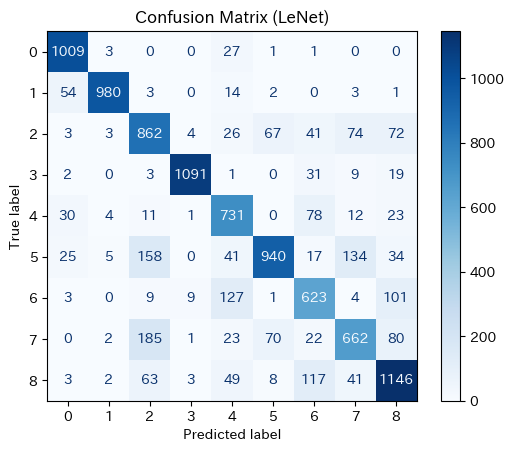

In [16]:
def main():
    # 初期設定
    set_seed(42)
    n_channels = 3
    n_classes = 9
    n_epochs = 50
    lr = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    viz = Visdom(server="http://host.docker.internal", port=8097)
    assert viz.check_connection(), "Visdom サーバーが起動していません。"

    # モデル、損失関数、最適化アルゴリズム、スケジューラの設定
    model = LeNet(in_channels=n_channels, num_classes=n_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    # scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name="LeNet", scheduler=None)
    # 学習と検証
    y_true_val, y_pred_val = trainer.fit(train_dataloader, val_dataloader, n_epochs, viz)
    # 検証データの混同行列
    trainer.plot_confusion_matrix(y_true_val, y_pred_val, labels=[str(i) for i in range(n_classes)])

if __name__ == "__main__":
    main()

<left><img src="./imgs/LeNet_Loss.png" width=600px></left>
<left><img src="./imgs/LeNet_Accuracy.png" width=600px></left>

- ベースラインとして検証データで損失0.0043、正答率80.4％の性能となった。

| No  | モデル                | 変更点                                                      | Epoch（最大50） | 【訓練】loss | 【検証】loss | 【訓練】Accuracy | 【検証】Accuracy | 結果                                      |
|-----|-----------------------|------------------------------------------------------------|-----------------|--------------|--------------|------------------|------------------|-------------------------------------------|
| 3.1 | LeNet                |                                                            | 50              | 0.0041       | 0.0043       | 0.8043           | 0.8041           |                                          低下した      | |

### 3.2 ベースライン②：SmallVGG

**構造**  
- 入力
    - 【入力】 28×28×3チャンネルの画像
- ブロック1
    - 【畳み込み層1-1】 3×3フィルター×32チャンネル（1パディング）を適用 → 28×28×32の特徴マップを得る
    - 【畳み込み層1-2】 3×3フィルター×32チャンネル（1パディング）を適用 → 28×28×32の特徴マップを得る
    - 【プーリング層1】 2×2最大プーリング、ストライド幅2 → 14×14×32の特徴マップを得る
- ブロック2
    - 【畳み込み層2-1】 3×3フィルター×64チャンネル（1パディング）を適用 → 14×14×64の特徴マップを得る
    - 【畳み込み層2-2】 3×3フィルター×64チャンネル（1パディング）を適用 → 14×14×64の特徴マップを得る
    - 【プーリング層2】 2×2最大プーリング、ストライド幅2 → 7×7×64の特徴マップを得る
- 全結合層
    - 【全結合層1】 64×7×7の特徴量をフラット化 → 256ユニット
    - 【全結合層2】 256ユニット → 9ユニット
- 出力
    - 【出力】 9次元ベクトル（各クラスの出力確率）

In [17]:
class SmallVGG(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SmallVGG, self).__init__()
        self.features = nn.Sequential(
            # ブロック1
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14

            # ブロック2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 14x14 -> 7x7
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 7 * 7, 256),  # Flattenした特徴量を全結合層に入力
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # フラット化
        x = self.classifier(x)
        return x

Setting up a new session...


Epoch 1, Train Loss: 0.0171, Train Acc: 0.1429
Val Loss: 0.0170, Val Acc: 0.2306
Best model saved at epoch 1
Epoch 2, Train Loss: 0.0138, Train Acc: 0.3378
Val Loss: 0.0115, Val Acc: 0.4203
Best model saved at epoch 2
Epoch 3, Train Loss: 0.0097, Train Acc: 0.5228
Val Loss: 0.0091, Val Acc: 0.5465
Best model saved at epoch 3
Epoch 4, Train Loss: 0.0084, Train Acc: 0.5924
Val Loss: 0.0091, Val Acc: 0.5744
Epoch 5, Train Loss: 0.0079, Train Acc: 0.6133
Val Loss: 0.0077, Val Acc: 0.5910
Best model saved at epoch 5
Epoch 6, Train Loss: 0.0076, Train Acc: 0.6265
Val Loss: 0.0072, Val Acc: 0.6489
Best model saved at epoch 6
Epoch 7, Train Loss: 0.0074, Train Acc: 0.6349
Val Loss: 0.0071, Val Acc: 0.6529
Best model saved at epoch 7
Epoch 8, Train Loss: 0.0071, Train Acc: 0.6475
Val Loss: 0.0072, Val Acc: 0.6464
Epoch 9, Train Loss: 0.0068, Train Acc: 0.6610
Val Loss: 0.0067, Val Acc: 0.6694
Best model saved at epoch 9
Epoch 10, Train Loss: 0.0065, Train Acc: 0.6798
Val Loss: 0.0060, Val Acc: 

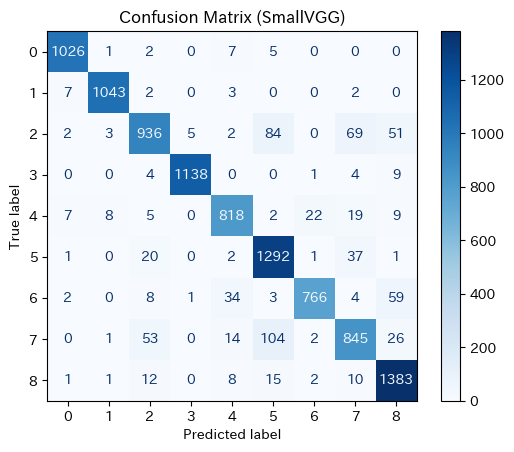

In [18]:
def main():
    # 初期設定
    set_seed(42)
    n_channels = 3
    n_classes = 9
    n_epochs = 50
    lr = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    viz = Visdom(server="http://host.docker.internal", port=8097)
    assert viz.check_connection(), "Visdom サーバーが起動していません。"

    # モデル、損失関数、最適化アルゴリズム、スケジューラの設定
    model = SmallVGG(in_channels=n_channels, num_classes=n_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    # scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name="SmallVGG", scheduler=None)
    # 学習と検証
    y_true_val, y_pred_val = trainer.fit(train_dataloader, val_dataloader, n_epochs, viz)
    # 検証データの混同行列
    trainer.plot_confusion_matrix(y_true_val, y_pred_val, labels=[str(i) for i in range(n_classes)])

if __name__ == "__main__":
    main()

<left><img src="./imgs/SmallVGG_Loss.png" width=600px></left>
<left><img src="./imgs/SmallVGG_Accuracy.png" width=600px></left>

- 層構造を深くしたSmallVGGがシンプルなアーキテクチャを持つLeNetの性能を上回った。
- ここからSmallVGGをベースとして、パラメータの調整を行っていきたい。

| No  | モデル                | 変更点                                                      | Epoch（最大50） | 【訓練】loss | 【検証】loss | 【訓練】Accuracy | 【検証】Accuracy | 結果                                      |
|-----|-----------------------|------------------------------------------------------------|-----------------|--------------|--------------|------------------|------------------|-------------------------------------------|
| 3.1 | LeNet                |                                                            | 50              | 0.0041       | 0.0043       | 0.8043           | 0.8041           |                                           |
| 3.2 | SmallVGG             |                                                            | 47              | 0.0020       | 0.0017       | 0.9081           | 0.9229           |                                         低下した      |  |

### 4.0 パラメータ調整

- SmallVGGのパラメータ調整として、以下3パターンを試したい。
    - **4.1 Batch Normalizationの追加**：学習の安定性向上と収束速度を改善を目指す。
    - **4.2 新たに畳み込み層にDropout(0.3)を適用**：過学習の抑制を目指す
    - **4.3 3ブロック構成で深い層を構築**：モデルの表現力向上を目指す。

#### 4.1 各畳み込み層の後にBatch Normalizationを追加

- 変更点：各畳み込み層の後にBatchNorm2dを追加
- 目的：学習の安定性を向上し、収束を速める

In [19]:
class SmallVGG_bn(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SmallVGG_bn, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 14x14 -> 7x7
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 7 * 7, 256),  # Flattenした特徴量を全結合層に入力
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # フラット化
        x = self.classifier(x)
        return x

Setting up a new session...


Epoch 1, Train Loss: 0.0068, Train Acc: 0.6806
Val Loss: 0.0053, Val Acc: 0.7484
Best model saved at epoch 1
Epoch 2, Train Loss: 0.0040, Train Acc: 0.8185
Val Loss: 0.0042, Val Acc: 0.8033
Best model saved at epoch 2
Epoch 3, Train Loss: 0.0031, Train Acc: 0.8646
Val Loss: 0.0026, Val Acc: 0.8849
Best model saved at epoch 3
Epoch 4, Train Loss: 0.0024, Train Acc: 0.8928
Val Loss: 0.0038, Val Acc: 0.8540
Epoch 5, Train Loss: 0.0021, Train Acc: 0.9085
Val Loss: 0.0020, Val Acc: 0.9119
Best model saved at epoch 5
Epoch 6, Train Loss: 0.0018, Train Acc: 0.9214
Val Loss: 0.0042, Val Acc: 0.8447
Epoch 7, Train Loss: 0.0017, Train Acc: 0.9268
Val Loss: 0.0021, Val Acc: 0.9129
Epoch 8, Train Loss: 0.0015, Train Acc: 0.9353
Val Loss: 0.0020, Val Acc: 0.9148
Best model saved at epoch 8
Epoch 9, Train Loss: 0.0013, Train Acc: 0.9424
Val Loss: 0.0025, Val Acc: 0.8995
Epoch 10, Train Loss: 0.0013, Train Acc: 0.9451
Val Loss: 0.0029, Val Acc: 0.8780
Epoch 11, Train Loss: 0.0012, Train Acc: 0.9464
V

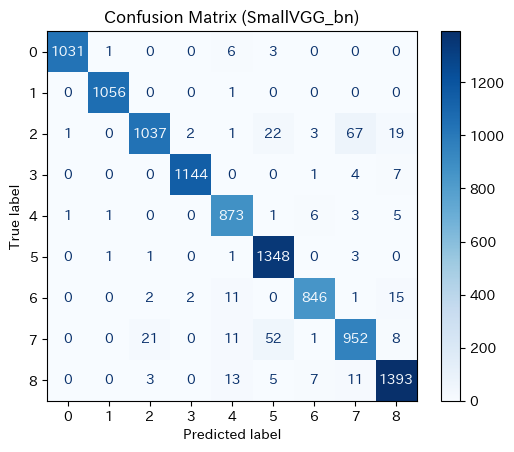

In [20]:
def main():
    # 初期設定
    set_seed(42)
    n_channels = 3
    n_classes = 9
    n_epochs = 50
    lr = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    viz = Visdom(server="http://host.docker.internal", port=8097)
    assert viz.check_connection(), "Visdom サーバーが起動していません。"

    # モデル、損失関数、最適化アルゴリズム、スケジューラの設定
    model = SmallVGG_bn(in_channels=n_channels, num_classes=n_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    # scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name="SmallVGG_bn", scheduler=None)

    # 学習と検証
    y_true_val, y_pred_val = trainer.fit(train_dataloader, val_dataloader, n_epochs, viz)

    # 検証データの混同行列
    trainer.plot_confusion_matrix(y_true_val, y_pred_val, labels=[str(i) for i in range(n_classes)])

if __name__ == "__main__":
    main()

<left><img src="./imgs/SmallVGG_bn_Loss.png" width=600px></left>
<left><img src="./imgs/SmallVGG_bn_Accuracy.png" width=600px></left>

| No  | モデル                | 変更点                                                      | Epoch（最大50） | 【訓練】loss | 【検証】loss | 【訓練】Accuracy | 【検証】Accuracy | 結果                                      |
|-----|-----------------------|------------------------------------------------------------|-----------------|--------------|--------------|------------------|------------------|-------------------------------------------|
| 3.1 | LeNet                |                                                            | 50              | 0.0041       | 0.0043       | 0.8043           | 0.8041           |                                           |
| 3.2 | SmallVGG             |                                                            | 47              | 0.0020       | 0.0017       | 0.9081           | 0.9229           |                                           |
| 4.1 | SmallVGG_bn          | 各畳み込み層の後に **BatchNorm2d** を追加                  | 40              | 0.0003       | 0.0007       | 0.9859           | 0.9716           | 若干収束が早まり性能も向上した         低下した      |した |

- バッチ正規化を加えたことで、特徴の値の範囲が安定し、収束が早まった。
- 次に、SmallVGGはDropoutを全結合層に適用していたが、畳み込みブロック後にも追加して性能を確かめてみる。

#### 4.2 Dropout(0.3) を畳み込みブロック後に追加

- 目的
過学習を抑制し、汎化性能を向上
- 変更点
各畳み込みブロックの後に Dropout(0.3) を追加

In [21]:
class SmallVGG_do(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SmallVGG_do, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14
            nn.Dropout(0.3),  # 過学習防止

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 14x14 -> 7x7
            nn.Dropout(0.3)  # 過学習防止
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 7 * 7, 256),  # Flattenした特徴量を全結合層に入力
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # フラット化
        x = self.classifier(x)
        return x

Setting up a new session...


Epoch 1, Train Loss: 0.0171, Train Acc: 0.1419
Val Loss: 0.0170, Val Acc: 0.1612
Best model saved at epoch 1
Epoch 2, Train Loss: 0.0140, Train Acc: 0.3213
Val Loss: 0.0115, Val Acc: 0.3970
Best model saved at epoch 2
Epoch 3, Train Loss: 0.0100, Train Acc: 0.5011
Val Loss: 0.0088, Val Acc: 0.5701
Best model saved at epoch 3
Epoch 4, Train Loss: 0.0087, Train Acc: 0.5726
Val Loss: 0.0080, Val Acc: 0.6054
Best model saved at epoch 4
Epoch 5, Train Loss: 0.0081, Train Acc: 0.6009
Val Loss: 0.0076, Val Acc: 0.6191
Best model saved at epoch 5
Epoch 6, Train Loss: 0.0077, Train Acc: 0.6179
Val Loss: 0.0082, Val Acc: 0.6022
Epoch 7, Train Loss: 0.0074, Train Acc: 0.6336
Val Loss: 0.0070, Val Acc: 0.6628
Best model saved at epoch 7
Epoch 8, Train Loss: 0.0070, Train Acc: 0.6545
Val Loss: 0.0068, Val Acc: 0.6665
Best model saved at epoch 8
Epoch 9, Train Loss: 0.0067, Train Acc: 0.6671
Val Loss: 0.0063, Val Acc: 0.6965
Best model saved at epoch 9
Epoch 10, Train Loss: 0.0065, Train Acc: 0.6806

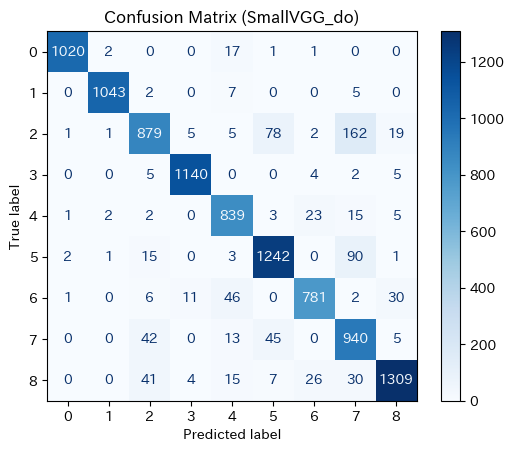

In [22]:
def main():
    # 初期設定
    set_seed(42)
    n_channels = 3
    n_classes = 9
    n_epochs = 50
    lr = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    viz = Visdom(server="http://host.docker.internal", port=8097)
    assert viz.check_connection(), "Visdom サーバーが起動していません。"

    # モデル、損失関数、最適化アルゴリズム、スケジューラの設定
    model = SmallVGG_do(in_channels=n_channels, num_classes=n_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    # scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name="SmallVGG_do", scheduler=None)

    # 学習と検証
    y_true_val, y_pred_val = trainer.fit(train_dataloader, val_dataloader, n_epochs, viz)

    # 検証データの混同行列
    trainer.plot_confusion_matrix(y_true_val, y_pred_val, labels=[str(i) for i in range(n_classes)])

if __name__ == "__main__":
    main()

<left><img src="./imgs/SmallVGG_do_Loss.png" width=600px></left>
<left><img src="./imgs/SmallVGG_do_Accuracy.png" width=600px></left>

| No  | モデル                | 変更点                                                      | Epoch（最大50） | 【訓練】loss | 【検証】loss | 【訓練】Accuracy | 【検証】Accuracy | 結果                                      |
|-----|-----------------------|------------------------------------------------------------|-----------------|--------------|--------------|------------------|------------------|-------------------------------------------|
| 3.1 | LeNet                |                                                            | 50              | 0.0041       | 0.0043       | 0.8043           | 0.8041           |                                           |
| 3.2 | SmallVGG             |                                                            | 47              | 0.0020       | 0.0017       | 0.9081           | 0.9229           |                                           |
| 4.1 | SmallVGG_bn          | 各畳み込み層の後に **BatchNorm2d** を追加                  | 40              | 0.0003       | 0.0007       | 0.9859           | 0.9716           | 若干収束が早まり性能も向上した            |
| 4.2 | SmallVGG_do          | 畳み込みブロックの後に **Dropout(0.3)** を追加             | 50              | 0.0022       | 0.0018       | 0.9019           | 0.9189           | 性能が低下したが学習曲線は安定した                        低下した      |下した |

#### 4.3 3ブロック＋ 各ブロック後に BatchNorm2d とDropout(0.3)を追加

- 目的
特徴抽出能力をさらに向上させつつ、正則化を強化
- 変更点
    - 畳み込みブロックを3つに拡張
    - 各畳み込み層の後に BatchNorm2d を追加
    - 各ブロック後に Dropout(0.3) を追加

In [23]:
class SmallVGG_3blocks(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SmallVGG_3blocks, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14
            nn.Dropout(0.3), # 過学習防止

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 14x14 -> 7x7
            nn.Dropout(0.3), # 過学習防止

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128), # 正規化
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 7x7 -> 3x3
            nn.Dropout(0.3) # 過学習防止
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 3 * 3, 256),  # Flattenした特徴量を全結合層に入力
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # フラット化
        x = self.classifier(x)
        return x

Setting up a new session...


Epoch 1, Train Loss: 0.0083, Train Acc: 0.6018
Val Loss: 0.0053, Val Acc: 0.7576
Best model saved at epoch 1
Epoch 2, Train Loss: 0.0049, Train Acc: 0.7731
Val Loss: 0.0048, Val Acc: 0.7783
Best model saved at epoch 2
Epoch 3, Train Loss: 0.0040, Train Acc: 0.8194
Val Loss: 0.0042, Val Acc: 0.7927
Best model saved at epoch 3
Epoch 4, Train Loss: 0.0033, Train Acc: 0.8516
Val Loss: 0.0061, Val Acc: 0.7426
Epoch 5, Train Loss: 0.0028, Train Acc: 0.8758
Val Loss: 0.0025, Val Acc: 0.8826
Best model saved at epoch 5
Epoch 6, Train Loss: 0.0025, Train Acc: 0.8902
Val Loss: 0.0029, Val Acc: 0.8794
Epoch 7, Train Loss: 0.0022, Train Acc: 0.9004
Val Loss: 0.0020, Val Acc: 0.9025
Best model saved at epoch 7
Epoch 8, Train Loss: 0.0020, Train Acc: 0.9113
Val Loss: 0.0033, Val Acc: 0.8721
Epoch 9, Train Loss: 0.0019, Train Acc: 0.9178
Val Loss: 0.0020, Val Acc: 0.9130
Best model saved at epoch 9
Epoch 10, Train Loss: 0.0017, Train Acc: 0.9243
Val Loss: 0.0019, Val Acc: 0.9211
Best model saved at e

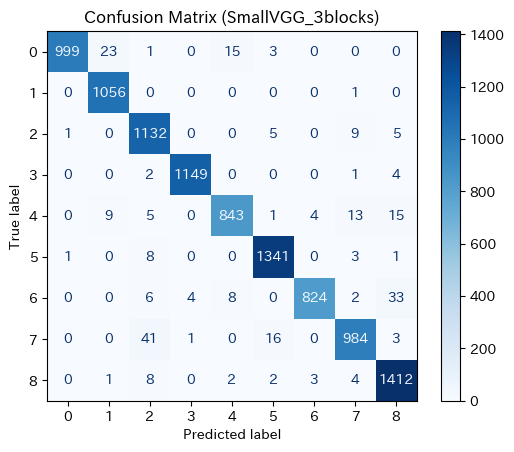

In [24]:
def main():
    # 初期設定
    set_seed(42)
    n_channels = 3
    n_classes = 9
    n_epochs = 50
    lr = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    viz = Visdom(server="http://host.docker.internal", port=8097)
    assert viz.check_connection(), "Visdom サーバーが起動していません。"

    # モデル、損失関数、最適化アルゴリズム、スケジューラの設定
    model = SmallVGG_3blocks(in_channels=n_channels, num_classes=n_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    # scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name="SmallVGG_3blocks", scheduler=None)

    # 学習と検証
    y_true_val, y_pred_val = trainer.fit(train_dataloader, val_dataloader, n_epochs, viz)

    # 検証データの混同行列
    trainer.plot_confusion_matrix(y_true_val, y_pred_val, labels=[str(i) for i in range(n_classes)])

if __name__ == "__main__":
    main()

<left><img src="./imgs/SmallVGG_3blocks_Loss.png" width=600px></left>
<left><img src="./imgs/SmallVGG_3blocks_Accuracy.png" width=600px></left>

| No  | モデル                | 変更点                                                      | Epoch（最大50） | 【訓練】loss | 【検証】loss | 【訓練】Accuracy | 【検証】Accuracy | 結果                                      |
|-----|-----------------------|------------------------------------------------------------|-----------------|--------------|--------------|------------------|------------------|-------------------------------------------|
| 3.1 | LeNet                |                                                            | 50              | 0.0041       | 0.0043       | 0.8043           | 0.8041           |                                           |
| 3.2 | SmallVGG             |                                                            | 47              | 0.0020       | 0.0017       | 0.9081           | 0.9229           |                                           |
| 4.1 | SmallVGG_bn          | 各畳み込み層の後に **BatchNorm2d** を追加                  | 40              | 0.0003       | 0.0007       | 0.9859           | 0.9716           | 若干収束が早まり性能も向上した            |
| 4.2 | SmallVGG_do          | 畳み込みブロックの後に **Dropout(0.3)** を追加             | 50              | 0.0022       | 0.0018       | 0.9019           | 0.9189           | 性能が低下したが学習曲線は安定した                            |
| 4.3 | **SmallVGG_3blocks** | 畳み込みブロックを**3つ**に拡張<br>各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加 | 50              | 0.0007       | **0.0005**   | 0.9689           | **0.9783**       | 層を深くすることで特徴量抽出能力が向上したが、学習曲線は不安定に低下した      |     |

- **BatchNorm2d**と、**畳み込みブロックを3つに拡張する**方法が有用だと分かった。
- ここからパラメータを調整していきたい。

#### 4.4 Batch Normalization を追加＋全結合層のdropoutを0.4に弱める

In [29]:
class SmallVGG_bn_do04(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SmallVGG_bn_do04, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 14x14 -> 7x7
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 7 * 7, 256),  # Flattenした特徴量を全結合層に入力
            nn.ReLU(),
            nn.Dropout(0.4), # 0.4にする
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # フラット化
        x = self.classifier(x)
        return x

Setting up a new session...


Epoch 1, Train Loss: 0.0066, Train Acc: 0.6886
Val Loss: 0.0064, Val Acc: 0.6933
Best model saved at epoch 1
Epoch 2, Train Loss: 0.0038, Train Acc: 0.8246
Val Loss: 0.0039, Val Acc: 0.8182
Best model saved at epoch 2
Epoch 3, Train Loss: 0.0029, Train Acc: 0.8705
Val Loss: 0.0027, Val Acc: 0.8795
Best model saved at epoch 3
Epoch 4, Train Loss: 0.0023, Train Acc: 0.8968
Val Loss: 0.0032, Val Acc: 0.8620
Epoch 5, Train Loss: 0.0020, Train Acc: 0.9125
Val Loss: 0.0020, Val Acc: 0.9144
Best model saved at epoch 5
Epoch 6, Train Loss: 0.0017, Train Acc: 0.9250
Val Loss: 0.0050, Val Acc: 0.8513
Epoch 7, Train Loss: 0.0016, Train Acc: 0.9313
Val Loss: 0.0021, Val Acc: 0.9103
Epoch 8, Train Loss: 0.0014, Train Acc: 0.9407
Val Loss: 0.0019, Val Acc: 0.9175
Best model saved at epoch 8
Epoch 9, Train Loss: 0.0012, Train Acc: 0.9461
Val Loss: 0.0024, Val Acc: 0.8997
Epoch 10, Train Loss: 0.0012, Train Acc: 0.9483
Val Loss: 0.0012, Val Acc: 0.9463
Best model saved at epoch 10
Epoch 11, Train Loss

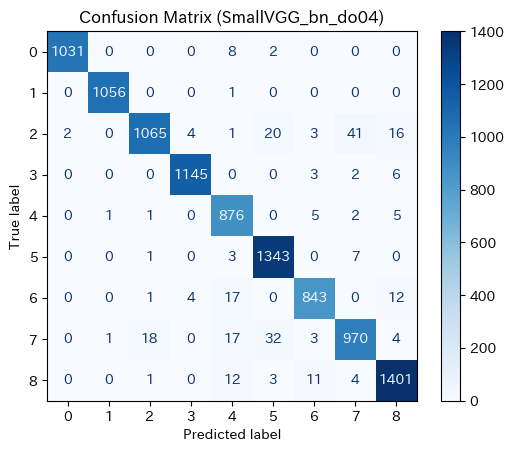

In [30]:
def main():
    # 初期設定
    set_seed(42)
    n_channels = 3
    n_classes = 9
    n_epochs = 50
    lr = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    viz = Visdom(server="http://host.docker.internal", port=8097)
    assert viz.check_connection(), "Visdom サーバーが起動していません。"

    # モデル、損失関数、最適化アルゴリズム、スケジューラの設定
    model = SmallVGG_bn_do04(in_channels=n_channels, num_classes=n_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    # scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name="SmallVGG_bn_do04", scheduler=None)

    # 学習と検証
    y_true_val, y_pred_val = trainer.fit(train_dataloader, val_dataloader, n_epochs, viz)

    # 検証データの混同行列
    trainer.plot_confusion_matrix(y_true_val, y_pred_val, labels=[str(i) for i in range(n_classes)])

if __name__ == "__main__":
    main()

<left><img src="./imgs/SmallVGG_bn_do04_Loss.png" width=600px></left>
<left><img src="./imgs/SmallVGG_bn_do04_Accuracy.png" width=600px></left>

| No  | モデル                | 変更点                                                      | Epoch（最大50） | 【訓練】loss | 【検証】loss | 【訓練】Accuracy | 【検証】Accuracy | 結果                                      |
|-----|-----------------------|------------------------------------------------------------|-----------------|--------------|--------------|------------------|------------------|-------------------------------------------|
| 3.1 | LeNet                |                                                            | 50              | 0.0041       | 0.0043       | 0.8043           | 0.8041           |                                           |
| 3.2 | SmallVGG             |                                                            | 47              | 0.0020       | 0.0017       | 0.9081           | 0.9229           |                                           |
| 4.1 | SmallVGG_bn          | 各畳み込み層の後に **BatchNorm2d** を追加                  | 40              | 0.0003       | 0.0007       | 0.9859           | 0.9716           | 若干収束が早まり性能も向上した            |
| 4.2 | SmallVGG_do          | 畳み込みブロックの後に **Dropout(0.3)** を追加             | 50              | 0.0022       | 0.0018       | 0.9019           | 0.9189           | 性能が低下したが学習曲線は安定した                            |
| 4.3 | **SmallVGG_3blocks** | 畳み込みブロックを**3つ**に拡張<br>各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加 | 50              | 0.0007       | **0.0005**   | 0.9689           | **0.9783**       | 層を深くすることで特徴量抽出能力が向上したが、学習曲線は不安定になった。 |
| 4.4 | **SmallVGG_bn_do04** | 各畳み込み層の後に **BatchNorm2d** を追加<br>全結合層の **Dropout(0.4)** に弱める | 39              | 0.0003       | **0.0006**   | 0.9882           | **0.9769**       | 性能は低下した      |      |

#### 4.5 Batch Normalization を追加＋学習率スケジュール

In [31]:
class SmallVGG_bn_lr(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SmallVGG_bn_lr, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 14x14 -> 7x7
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 7 * 7, 256),  # Flattenした特徴量を全結合層に入力
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # フラット化
        x = self.classifier(x)
        return x

Setting up a new session...


Epoch 1, Train Loss: 0.0068, Train Acc: 0.6806
Val Loss: 0.0053, Val Acc: 0.7484
Best model saved at epoch 1
Epoch 2, Train Loss: 0.0040, Train Acc: 0.8185
Val Loss: 0.0042, Val Acc: 0.8033
Best model saved at epoch 2
Epoch 3, Train Loss: 0.0031, Train Acc: 0.8646
Val Loss: 0.0026, Val Acc: 0.8849
Best model saved at epoch 3
Epoch 4, Train Loss: 0.0024, Train Acc: 0.8928
Val Loss: 0.0038, Val Acc: 0.8540
Epoch 5, Train Loss: 0.0021, Train Acc: 0.9085
Val Loss: 0.0020, Val Acc: 0.9119
Best model saved at epoch 5
Epoch 6, Train Loss: 0.0017, Train Acc: 0.9277
Val Loss: 0.0016, Val Acc: 0.9281
Best model saved at epoch 6
Epoch 7, Train Loss: 0.0016, Train Acc: 0.9327
Val Loss: 0.0016, Val Acc: 0.9298
Best model saved at epoch 7
Epoch 8, Train Loss: 0.0014, Train Acc: 0.9373
Val Loss: 0.0016, Val Acc: 0.9319
Best model saved at epoch 8
Epoch 9, Train Loss: 0.0014, Train Acc: 0.9419
Val Loss: 0.0023, Val Acc: 0.9029
Epoch 10, Train Loss: 0.0013, Train Acc: 0.9443
Val Loss: 0.0015, Val Acc: 

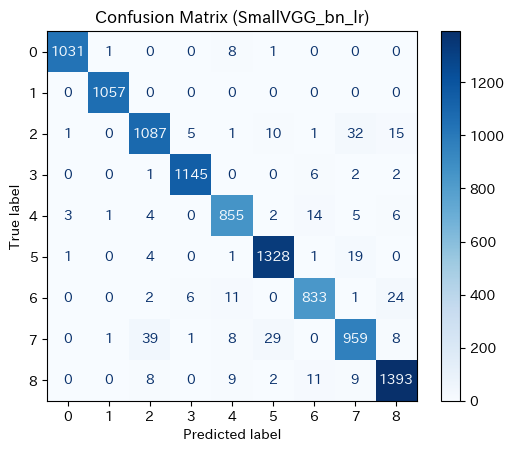

In [32]:
def main():
    # 初期設定
    set_seed(42)
    n_channels = 3
    n_classes = 9
    n_epochs = 50
    lr = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    viz = Visdom(server="http://host.docker.internal", port=8097)
    assert viz.check_connection(), "Visdom サーバーが起動していません。"

    # モデル、損失関数、最適化アルゴリズム、スケジューラの設定
    model = SmallVGG_bn_lr(in_channels=n_channels, num_classes=n_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name="SmallVGG_bn_lr", scheduler=scheduler)

    # 学習と検証
    y_true_val, y_pred_val = trainer.fit(train_dataloader, val_dataloader, n_epochs, viz)

    # 検証データの混同行列
    trainer.plot_confusion_matrix(y_true_val, y_pred_val, labels=[str(i) for i in range(n_classes)])

if __name__ == "__main__":
    main()

<left><img src="./imgs/SmallVGG_bn_lr_Loss.png" width=600px></left>
<left><img src="./imgs/SmallVGG_bn_lr_Accuracy.png" width=600px></left>

| No  | モデル                | 変更点                                                      | Epoch（最大50） | 【訓練】loss | 【検証】loss | 【訓練】Accuracy | 【検証】Accuracy | 結果                                      |
|-----|-----------------------|------------------------------------------------------------|-----------------|--------------|--------------|------------------|------------------|-------------------------------------------|
| 3.1 | LeNet                |                                                            | 50              | 0.0041       | 0.0043       | 0.8043           | 0.8041           |                                           |
| 3.2 | SmallVGG             |                                                            | 47              | 0.0020       | 0.0017       | 0.9081           | 0.9229           |                                           |
| 4.1 | SmallVGG_bn          | 各畳み込み層の後に **BatchNorm2d** を追加                  | 40              | 0.0003       | 0.0007       | 0.9859           | 0.9716           | 若干収束が早まり性能も向上した            |
| 4.2 | SmallVGG_do          | 畳み込みブロックの後に **Dropout(0.3)** を追加             | 50              | 0.0022       | 0.0018       | 0.9019           | 0.9189           | 性能が低下したが学習曲線は安定した                            |
| 4.3 | **SmallVGG_3blocks** | 畳み込みブロックを**3つ**に拡張<br>各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加 | 50              | 0.0007       | **0.0005**   | 0.9689           | **0.9783**       | 層を深くすることで特徴量抽出能力が向上したが、学習曲線は不安定になった。 |
| 4.4 | **SmallVGG_bn_do04** | 各畳み込み層の後に **BatchNorm2d** を追加<br>全結合層の **Dropout(0.4)** に弱める | 39              | 0.0003       | **0.0006**   | 0.9882           | **0.9769**       | 性能は向上した。 |
| 4.5 | SmallVGG_bn_lr       | 各畳み込み層の後に **BatchNorm2d** を追加<br>**学習率スケジュール**を追加 | 36              | 0.0008       | 0.0007       | 0.9673           | 0.9675           | 安定したが性能は下がった。      低下した      |9675   |

#### 4.6 Batch Normalization を追加＋畳み込み層の後にdropout(0.3)を追加

In [33]:
class SmallVGG_do_bn(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SmallVGG_do_bn, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14
            nn.Dropout(0.3),  # 過学習防止

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 14x14 -> 7x7
            nn.Dropout(0.3)   # 過学習防止
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 7 * 7, 256),  # Flattenした特徴量を全結合層に入力
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # フラット化
        x = self.classifier(x)
        return x

Setting up a new session...


Epoch 1, Train Loss: 0.0078, Train Acc: 0.6258
Val Loss: 0.0068, Val Acc: 0.6698
Best model saved at epoch 1
Epoch 2, Train Loss: 0.0050, Train Acc: 0.7695
Val Loss: 0.0044, Val Acc: 0.7974
Best model saved at epoch 2
Epoch 3, Train Loss: 0.0040, Train Acc: 0.8151
Val Loss: 0.0048, Val Acc: 0.7884
Epoch 4, Train Loss: 0.0034, Train Acc: 0.8441
Val Loss: 0.0033, Val Acc: 0.8518
Best model saved at epoch 4
Epoch 5, Train Loss: 0.0030, Train Acc: 0.8639
Val Loss: 0.0031, Val Acc: 0.8631
Best model saved at epoch 5
Epoch 6, Train Loss: 0.0027, Train Acc: 0.8807
Val Loss: 0.0027, Val Acc: 0.8708
Best model saved at epoch 6
Epoch 7, Train Loss: 0.0025, Train Acc: 0.8910
Val Loss: 0.0022, Val Acc: 0.9005
Best model saved at epoch 7
Epoch 8, Train Loss: 0.0023, Train Acc: 0.8993
Val Loss: 0.0021, Val Acc: 0.9055
Best model saved at epoch 8
Epoch 9, Train Loss: 0.0021, Train Acc: 0.9062
Val Loss: 0.0017, Val Acc: 0.9250
Best model saved at epoch 9
Epoch 10, Train Loss: 0.0020, Train Acc: 0.9129

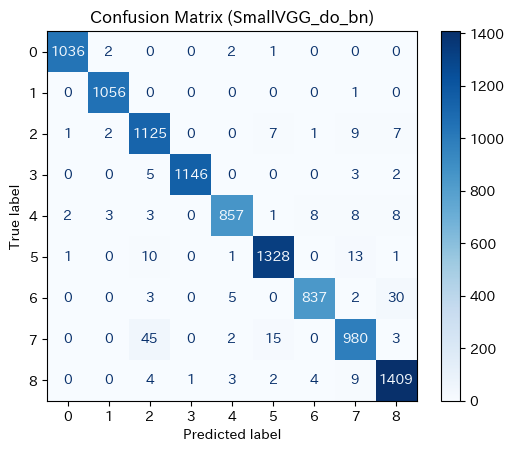

In [34]:
def main():
    # 初期設定
    set_seed(42)
    n_channels = 3
    n_classes = 9
    n_epochs = 50
    lr = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    viz = Visdom(server="http://host.docker.internal", port=8097)
    assert viz.check_connection(), "Visdom サーバーが起動していません。"

    # モデル、損失関数、最適化アルゴリズム、スケジューラの設定
    model = SmallVGG_do_bn(in_channels=n_channels, num_classes=n_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    # scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name="SmallVGG_do_bn", scheduler=None)

    # 学習と検証
    y_true_val, y_pred_val = trainer.fit(train_dataloader, val_dataloader, n_epochs, viz)

    # 検証データの混同行列
    trainer.plot_confusion_matrix(y_true_val, y_pred_val, labels=[str(i) for i in range(n_classes)])

if __name__ == "__main__":
    main()

<left><img src="./imgs/SmallVGG_do_bn_Loss.png" width=600px></left>
<left><img src="./imgs/SmallVGG_do_bn_Accuracy.png" width=600px></left>

| No  | モデル                | 変更点                                                      | Epoch（最大50） | 【訓練】loss | 【検証】loss | 【訓練】Accuracy | 【検証】Accuracy | 結果                                      |
|-----|-----------------------|------------------------------------------------------------|-----------------|--------------|--------------|------------------|------------------|-------------------------------------------|
| 3.1 | LeNet                |                                                            | 50              | 0.0041       | 0.0043       | 0.8043           | 0.8041           |                                           |
| 3.2 | SmallVGG             |                                                            | 47              | 0.0020       | 0.0017       | 0.9081           | 0.9229           |                                           |
| 4.1 | SmallVGG_bn          | 各畳み込み層の後に **BatchNorm2d** を追加                  | 40              | 0.0003       | 0.0007       | 0.9859           | 0.9716           | 若干収束が早まり性能も向上した            |
| 4.2 | SmallVGG_do          | 畳み込みブロックの後に **Dropout(0.3)** を追加             | 50              | 0.0022       | 0.0018       | 0.9019           | 0.9189           | 性能が低下したが学習曲線は安定した                            |
| 4.3 | **SmallVGG_3blocks** | 畳み込みブロックを**3つ**に拡張<br>各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加 | 50              | 0.0007       | **0.0005**   | 0.9689           | **0.9783**       | 層を深くすることで特徴量抽出能力が向上したが、学習曲線は不安定になった。 |
| 4.4 | **SmallVGG_bn_do04** | 各畳み込み層の後に **BatchNorm2d** を追加<br>全結合層の **Dropout(0.4)** に弱める | 39              | 0.0003       | **0.0006**   | 0.9882           | **0.9769**       | 性能は向上した。 |
| 4.5 | SmallVGG_bn_lr       | 各畳み込み層の後に **BatchNorm2d** を追加<br>**学習率スケジュール**を追加 | 36              | 0.0008       | 0.0007       | 0.9673           | 0.9675           | 安定したが性能は下がった。             |
| 4.6 | **SmallVGG_do_bn**   | 各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加 | 50              | 0.0007       | **0.0005**   | 0.9701           | **0.9770**       | 性能もよく過学習の傾向が比較的少ない    低下した      |

#### 4.7 3ブロック＋ 各ブロック後に BatchNorm2d とDropout(0.3)とを追加＋学習率スケジュール

- 「SmallVGG_3blocks」は学習曲線が安定しなかったため、学習率スケジュールを追加する。
- また、Dropoutの強さを変えて性能を確かめたい。

In [25]:
class SmallVGG_3blocks_lr(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SmallVGG_3blocks_lr, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14
            nn.Dropout(0.3), # 過学習防止

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 14x14 -> 7x7
            nn.Dropout(0.3), # 過学習防止

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128), # 正規化
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 7x7 -> 3x3
            nn.Dropout(0.3) # 過学習防止
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 3 * 3, 256),  # Flattenした特徴量を全結合層に入力
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # フラット化
        x = self.classifier(x)
        return x

Setting up a new session...


Epoch 1, Train Loss: 0.0083, Train Acc: 0.6018
Val Loss: 0.0053, Val Acc: 0.7576
Best model saved at epoch 1
Epoch 2, Train Loss: 0.0049, Train Acc: 0.7731
Val Loss: 0.0048, Val Acc: 0.7783
Best model saved at epoch 2
Epoch 3, Train Loss: 0.0040, Train Acc: 0.8194
Val Loss: 0.0042, Val Acc: 0.7927
Best model saved at epoch 3
Epoch 4, Train Loss: 0.0033, Train Acc: 0.8516
Val Loss: 0.0061, Val Acc: 0.7426
Epoch 5, Train Loss: 0.0028, Train Acc: 0.8758
Val Loss: 0.0025, Val Acc: 0.8826
Best model saved at epoch 5
Epoch 6, Train Loss: 0.0023, Train Acc: 0.8973
Val Loss: 0.0022, Val Acc: 0.9063
Best model saved at epoch 6
Epoch 7, Train Loss: 0.0022, Train Acc: 0.9015
Val Loss: 0.0019, Val Acc: 0.9177
Best model saved at epoch 7
Epoch 8, Train Loss: 0.0021, Train Acc: 0.9091
Val Loss: 0.0019, Val Acc: 0.9201
Epoch 9, Train Loss: 0.0020, Train Acc: 0.9128
Val Loss: 0.0018, Val Acc: 0.9226
Best model saved at epoch 9
Epoch 10, Train Loss: 0.0019, Train Acc: 0.9169
Val Loss: 0.0021, Val Acc: 

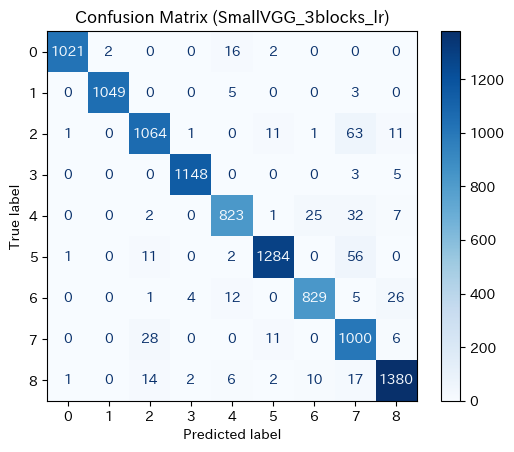

In [26]:
def main():
    # 初期設定
    set_seed(42)
    n_channels = 3
    n_classes = 9
    n_epochs = 50
    lr = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    viz = Visdom(server="http://host.docker.internal", port=8097)
    assert viz.check_connection(), "Visdom サーバーが起動していません。"

    # モデル、損失関数、最適化アルゴリズム、スケジューラの設定
    model = SmallVGG_3blocks_lr(in_channels=n_channels, num_classes=n_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name="SmallVGG_3blocks_lr", scheduler=scheduler)

    # 学習と検証
    y_true_val, y_pred_val = trainer.fit(train_dataloader, val_dataloader, n_epochs, viz)

    # 検証データの混同行列
    trainer.plot_confusion_matrix(y_true_val, y_pred_val, labels=[str(i) for i in range(n_classes)])

if __name__ == "__main__":
    main()

<left><img src="./imgs/SmallVGG_3blocks_lr_Loss.png" width=600px></left>
<left><img src="./imgs/SmallVGG_3blocks_lr_Accuracy.png" width=600px></left>

| No  | モデル                | 変更点                                                      | Epoch（最大50） | 【訓練】loss | 【検証】loss | 【訓練】Accuracy | 【検証】Accuracy | 結果                                      |
|-----|-----------------------|------------------------------------------------------------|-----------------|--------------|--------------|------------------|------------------|-------------------------------------------|
| 3.1 | LeNet                |                                                            | 50              | 0.0041       | 0.0043       | 0.8043           | 0.8041           |                                           |
| 3.2 | SmallVGG             |                                                            | 47              | 0.0020       | 0.0017       | 0.9081           | 0.9229           |                                           |
| 4.1 | SmallVGG_bn          | 各畳み込み層の後に **BatchNorm2d** を追加                  | 40              | 0.0003       | 0.0007       | 0.9859           | 0.9716           | 若干収束が早まり性能も向上した            |
| 4.2 | SmallVGG_do          | 畳み込みブロックの後に **Dropout(0.3)** を追加             | 50              | 0.0022       | 0.0018       | 0.9019           | 0.9189           | 性能が低下したが学習曲線は安定した                            |
| 4.3 | **SmallVGG_3blocks** | 畳み込みブロックを**3つ**に拡張<br>各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加 | 50              | 0.0007       | **0.0005**   | 0.9689           | **0.9783**       | 層を深くすることで特徴量抽出能力が向上したが、学習曲線は不安定になった。 |
| 4.4 | **SmallVGG_bn_do04** | 各畳み込み層の後に **BatchNorm2d** を追加<br>全結合層の **Dropout(0.4)** に弱める | 39              | 0.0003       | **0.0006**   | 0.9882           | **0.9769**       | 性能は向上した。 |
| 4.5 | SmallVGG_bn_lr       | 各畳み込み層の後に **BatchNorm2d** を追加<br>**学習率スケジュール**を追加 | 36              | 0.0008       | 0.0007       | 0.9673           | 0.9675           | 安定したが性能は下がった。             |
| 4.6 | **SmallVGG_do_bn**   | 各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加 | 50              | 0.0007       | **0.0005**   | 0.9701           | **0.9770**       | 性能もよく過学習の傾向が比較的少ない            |
| 4.7 | SmallVGG_3blocks_lr  | 畳み込みブロックを**3つ**に拡張<br>各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加<br>**学習率スケジュール**を追加 | 43              | 0.0013       | 0.0009       | 0.9454           | 0.9623           | 学習率が小さくなることで若干性能が低下した。また、過学習低下した      |学習の傾向が強まる。

#### 4.8 3ブロック＋ 各ブロック後に BatchNorm2d とDropout(0.5)とを追加＋学習率スケジュール

In [27]:
class SmallVGG_3blocks_lr_do05(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super(SmallVGG_3blocks_lr_do05, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14
            nn.Dropout(0.5), # 過学習防止(0.5)

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 14x14 -> 7x7
            nn.Dropout(0.5), # 過学習防止(0.5)

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128), # 正規化
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128), # 正規化
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 7x7 -> 3x3
            nn.Dropout(0.5) # 過学習防止(0.5)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 3 * 3, 256),  # Flattenした特徴量を全結合層に入力
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # フラット化
        x = self.classifier(x)
        return x

Setting up a new session...


Epoch 1, Train Loss: 0.0098, Train Acc: 0.5208
Val Loss: 0.0087, Val Acc: 0.5984
Best model saved at epoch 1
Epoch 2, Train Loss: 0.0062, Train Acc: 0.7081
Val Loss: 0.0074, Val Acc: 0.6661
Best model saved at epoch 2
Epoch 3, Train Loss: 0.0051, Train Acc: 0.7696
Val Loss: 0.0095, Val Acc: 0.6277
Epoch 4, Train Loss: 0.0044, Train Acc: 0.8015
Val Loss: 0.0085, Val Acc: 0.6681
Epoch 5, Train Loss: 0.0039, Train Acc: 0.8234
Val Loss: 0.0060, Val Acc: 0.7539
Best model saved at epoch 5
Epoch 6, Train Loss: 0.0034, Train Acc: 0.8472
Val Loss: 0.0041, Val Acc: 0.8194
Best model saved at epoch 6
Epoch 7, Train Loss: 0.0032, Train Acc: 0.8541
Val Loss: 0.0044, Val Acc: 0.8001
Epoch 8, Train Loss: 0.0030, Train Acc: 0.8635
Val Loss: 0.0045, Val Acc: 0.7954
Epoch 9, Train Loss: 0.0029, Train Acc: 0.8711
Val Loss: 0.0050, Val Acc: 0.7830
Epoch 10, Train Loss: 0.0028, Train Acc: 0.8758
Val Loss: 0.0045, Val Acc: 0.8123
Epoch 11, Train Loss: 0.0026, Train Acc: 0.8842
Val Loss: 0.0028, Val Acc: 0.

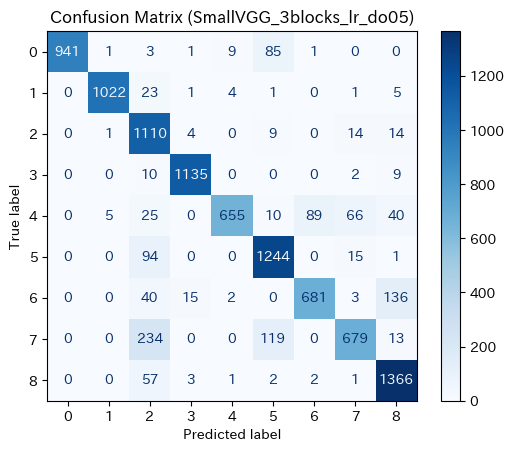

In [28]:
def main():
    # 初期設定
    set_seed(42)
    n_channels = 3
    n_classes = 9
    n_epochs = 50
    lr = 0.001
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    viz = Visdom(server="http://host.docker.internal", port=8097)
    assert viz.check_connection(), "Visdom サーバーが起動していません。"

    # モデル、損失関数、最適化アルゴリズム、スケジューラの設定
    model = SmallVGG_3blocks_lr_do05(in_channels=n_channels, num_classes=n_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name="SmallVGG_3blocks_lr_do05", scheduler=scheduler)

    # 学習と検証
    y_true_val, y_pred_val = trainer.fit(train_dataloader, val_dataloader, n_epochs, viz)

    # 検証データの混同行列
    trainer.plot_confusion_matrix(y_true_val, y_pred_val, labels=[str(i) for i in range(n_classes)])

if __name__ == "__main__":
    main()

<left><img src="./imgs/SmallVGG_3blocks_lr_do05_Loss.png" width=600px></left>
<left><img src="./imgs/SmallVGG_3blocks_lr_do05_Accuracy.png" width=600px></left>

| No  | モデル                | 変更点                                                      | Epoch（最大50） | 【訓練】loss | 【検証】loss | 【訓練】Accuracy | 【検証】Accuracy | 結果                                      |
|-----|-----------------------|------------------------------------------------------------|-----------------|--------------|--------------|------------------|------------------|-------------------------------------------|
| 3.1 | LeNet                |                                                            | 50              | 0.0041       | 0.0043       | 0.8043           | 0.8041           |                                           |
| 3.2 | SmallVGG             |                                                            | 47              | 0.0020       | 0.0017       | 0.9081           | 0.9229           |                                           |
| 4.1 | SmallVGG_bn          | 各畳み込み層の後に **BatchNorm2d** を追加                  | 40              | 0.0003       | 0.0007       | 0.9859           | 0.9716           | 若干収束が早まり性能も向上した            |
| 4.2 | SmallVGG_do          | 畳み込みブロックの後に **Dropout(0.3)** を追加             | 50              | 0.0022       | 0.0018       | 0.9019           | 0.9189           | 性能が低下したが学習曲線は安定した                            |
| 4.3 | **SmallVGG_3blocks** | 畳み込みブロックを**3つ**に拡張<br>各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加 | 50              | 0.0007       | **0.0005**   | 0.9689           | **0.9783**       | 層を深くすることで特徴量抽出能力が向上したが、学習曲線は不安定になった。 |
| 4.4 | **SmallVGG_bn_do04** | 各畳み込み層の後に **BatchNorm2d** を追加<br>全結合層の **Dropout(0.4)** に弱める | 39              | 0.0003       | **0.0006**   | 0.9882           | **0.9769**       | 性能は向上した。 |
| 4.5 | SmallVGG_bn_lr       | 各畳み込み層の後に **BatchNorm2d** を追加<br>**学習率スケジュール**を追加 | 36              | 0.0008       | 0.0007       | 0.9673           | 0.9675           | 安定したが性能は下がった。             |
| 4.6 | **SmallVGG_do_bn**   | 各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加 | 50              | 0.0007       | **0.0005**   | 0.9701           | **0.9770**       | 性能もよく過学習の傾向が比較的少ない            |
| 4.7 | SmallVGG_3blocks_lr  | 畳み込みブロックを**3つ**に拡張<br>各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.3)** を追加<br>**学習率スケジュール**を追加 | 43              | 0.0013       | 0.0009       | 0.9454           | 0.9623           | 学習率が小さくなることで若干性能が低下した。また、過学習の傾向が強まる。 |
| 4.8 | SmallVGG_3blocks_lr_do05 | 畳み込みブロックを**3つ**に拡張<br>各畳み込み層の後に **BatchNorm2d** を追加<br>各ブロック後に **Dropout(0.5)** を追加<br>**学習率スケジュール**を追加 | 16              | 0.0023       | 0.0021       | 0.9005           | 0.9068           | 過学習傾向がなくなり収束は早まったが性能が低下した      |下した      |


#### テストデータで性能評価

- ここまでで97.5%以上の正答率を記録した「SmallVGG_3blocks」「SmallVGG_bn_do04」「SmallVGG_do_bn」において、テストデータでの性能を確かめたい。

In [52]:
def test_evaluate(model_class, model_name="model", in_channels=3, num_classes=9, best_model_path=None):
    # model_classは__main__.SmallVGG_do_bnという形なので、model_nameでモデル名を指定する
    set_seed(42)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    if best_model_path is None: # 保存済みモデルのパスは自動で決定
        best_model_path = f"best_model_{model_name}.pth"
        
    # モデルのインスタンス化とロード
    model = model_class(in_channels=in_channels, num_classes=num_classes).to(device)
    model.load_state_dict(torch.load(best_model_path, weights_only=True))
    print(f"Loaded model weights from: {best_model_path}")
    
    # 評価用
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # 評価には不要だが、ModelCommon関数の引数で必要なため
    trainer = ModelCommon(model, criterion, optimizer, device, experiment_name=model_name, scheduler=None)
    
    # test_dataでの評価
    avg_test_loss, avg_test_acc, y_ture_test, y_pred_test = trainer.evaluate(test_dataloader) # テストローダー
    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_acc:.4f}")
    trainer.plot_confusion_matrix(y_ture_test, y_pred_test, labels=[str(i) for i in range(num_classes)])
    
    return avg_test_loss, avg_test_acc

Loaded model weights from: best_model_SmallVGG_3blocks.pth
Test Loss: 0.0042, Test Accuracy: 0.8728


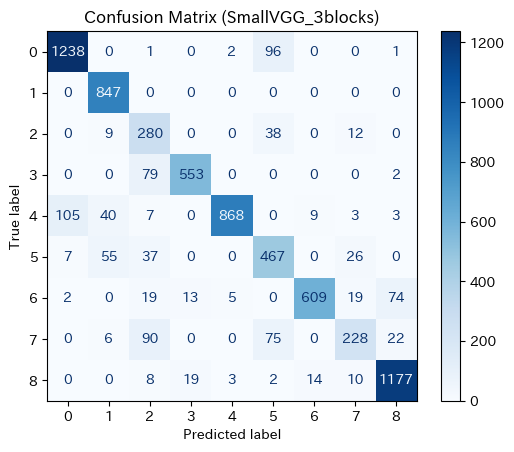

(0.004222482420026758, 0.8728412256267409)

In [56]:
test_evaluate(SmallVGG_3blocks, model_name="SmallVGG_3blocks")

Loaded model weights from: best_model_SmallVGG_bn_do04.pth
Test Loss: 0.0041, Test Accuracy: 0.8957


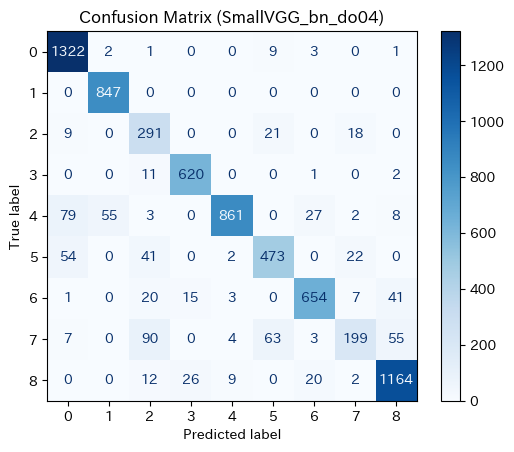

(0.00406088592552043, 0.8956824512534819)

In [55]:
test_evaluate(SmallVGG_bn_do04, model_name="SmallVGG_bn_do04")

Loaded model weights from: best_model_SmallVGG_do_bn.pth
Test Loss: 0.0047, Test Accuracy: 0.8442


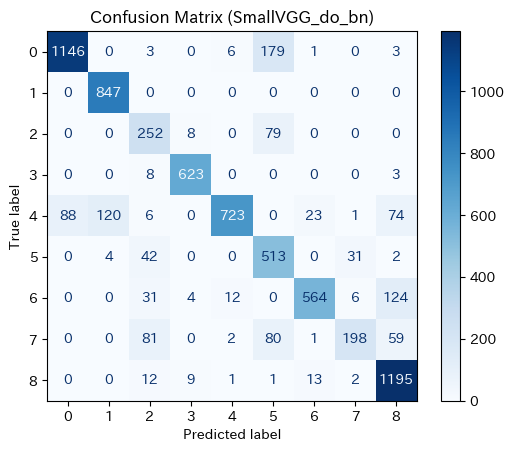

(0.004656187208333056, 0.844150417827298)

In [53]:
test_evaluate(SmallVGG_do_bn, model_name="SmallVGG_do_bn")

- テストデータでは、**4.4 SmallVGG_bn_do04** が最も良い性能を記録した。総合的にも優れており、今回のベストモデルとしたい。
    - テストデータで最高の**Loss：0.0041、Accuracy：0.8957** を記録
    - 検証データの性能も**Loss：0.0006, Accuracy：0.9769**と高い  
→ 検証性能とテスト性能のギャップが3つの中で一番小さいため、モデルの汎化性能が比較的良好

## 5.0 まとめ

- **成果**
  - 本分析では、病理組織画像の多クラス分類において、テストデータで**Loss：0.0041、Accuracy：0.8957**達成するモデルを構築できた。
  - ベースラインとしたSmallVGGモデルでは、VGGの複雑な構造を2ブロックに簡略化することで軽量化し、さらにBatch Normalizationや畳み込み層へのDropoutの適用といった工夫を施すことで、学習の安定性と性能向上を実現できた。
- **課題**
  - 過学習の兆候が見られたため、汎化性能の向上が今後の課題として残る。
  - 具体的には、<b>データ拡張（回転、拡大、平行移動等）</b>や、より大規模なデータセットを活用した学習が効果的であると推測される。